**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as Matteo Courthoud in towardsdatascience. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 06 Selección de variables

La librearía de Feature-Selector tiene 5 funciones para seleccionar los mejores *features*, identificando y eliminando columnas utilizando como criterios los datos faltantes, las columnas con valores únicos que no le aportan al modelo, las columnas que sean correlacionables, y las columnas sin importancia o con muy baja. Para lo cual contiene las siguientes funciones:

- identify_missing                                                                                                  
- identify_single_unique                                                                                                 
- identify_collinear                                                                                                       
- identify_zero_importance                                                                                                 
- identify_low_importance

Las 3 primeras funciones ya fueron utilizadas en el procesamiento de datos. A continuación se presenta las dos ultimas funciones para identificar automáticamente la importancia de las variables.

In [1]:
import numpy as np
import pandas as pd
import eli5

ModuleNotFoundError: No module named 'eli5'

In [3]:
data= pd.read_excel('G:\My Drive\CATEDRA\MACHINE LEARNING\datos\procesamiento_datos.xlsx', sheet_name='Sheet1')
data.head(5)

,Unnamed: 0,Name,Color,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,...,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Categoria,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
0,0,DESMOTADORA (Dabeiba),amarillo,2.0,3,4.9820,4.048,0.907351,2.00,2.20422,...,0.602168,0.567260,0.515155,1.319,A,0.223408,1.280198,0.582183,-0.540971,Torrencial
1,1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,verde,2.0,3,6.5693,5.997,0.531716,2.00,3.7614,...,0.45667,0.107055,1.032682,1.968,B,0.219618,0.952858,0.534278,-0.626839,Torrencial
2,2,LIBORIANA (Salgar),NaN,3.0,12,31.8530,18.117,1.496572,3.25,2.09929,...,0.376731,0.111298,0.919901,2.484,A,0.120483,1.350146,0.324482,-1.125524,Torrencial
3,3,LA ARENOSA (San Carlos),amarillo,NaN,31,338.2300,6.152,2.050357,5.00,2.96581,...,1.17162,5.639499,0.227900,0.903,B,0.125434,1.981134,0.260024,-1.346980,Torrencial
4,4,EL BARRO (Bello),rojo,NaN,4,10.4070,7.350,5.128386,3.00,0.584979,...,0.384357,0.363731,0.513981,1.299,B,0.136407,1.263665,0.397153,-0.923434,Torrencial


In [4]:
X=data.drop(['Name', 'Flash flood record'],axis=1)
y=data['Flash flood record']

In [7]:
data.columns

Index(['Unnamed: 0', 'Name', 'Color', 'Main Stream Order', 'Number of streams',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Ro Coefficient', 'Lenght of Basin', 'Area ',
       'Perimeter', 'Form Factor', 'Elongation Ratio', 'Circularity Ratio',
       'Compactness Coefficient', 'Texture Ratio', 'Fitness Ratio',
       'Wandering ratio', 'Stream Frequency', 'Drainage Density',
       'Constant Channel mantenance', 'Drainage Intensity',
       'Infiltrarion Number', 'Leght of overland flow', 'Relief', 'Categoria',
       'Relief Ratio', 'Rudgeness Number', 'Melton Index', 'Ln Melton',
       'Flash flood record'],
      dtype='object')

In [ ]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Para correr el gradiente *gradient boosting model* se reqeuire un *one hot encoding* de las variables independientes. Las cuales son guardadas en *base_features*.

In [ ]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

La tabla con todas las variables, incluidas a las que le fue aplicado el método *one hot encoding* se encuentra en *data_all*. 

In [ ]:
fs.data_all.head(10)

Para obtener las variables que presenta un valor de cero (0) en la importancia se utiliza: 

In [ ]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

Se puede graficar el valor normalizado de importancia de todas las variables. Ademas es posible ingresar un umbral, en este caso 0.99, que señala que solo se muestren las variables que suman el 99% de la importancia total de todas las variables. 

In [ ]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

Tambien se puede obtener la tabla con el valor normalizado y el valor acumulado de todas las variables. 

In [ ]:
fs.feature_importances.head(10)

Tambien es posible generar una lista con el número de "n" variables mas importantes de la siguiente forma:

In [ ]:
one_hundred_features = list(fs.feature_importances.loc[:3, 'feature'])
one_hundred_features

Es importante tener en cuenta que este es un metodo probabilístico por lo cual cada corrida puede dar valores ligeramente diferentes.

para identificar los feature que sumen el 99% de importancia, se utiliza:

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

The low importance features to remove are those that do not contribute to the specified cumulative importance. These are also available in the ops dictionary.

In [ ]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:10]

### Selección de variables con *SelecktBest*

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
data= pd.read_excel('G:\My Drive\ANALISIS ESPACIAL APLICADO\datos\Cuencas_torrencialidad.xlsx', sheet_name='Hoja2')
X=data.drop(['Name', 'Flash flood record'],axis=1)
y=data['Flash flood record']

In [ ]:
selector = SelectKBest(mutual_info_regression, k=4)
fit=selector.fit(X,y)

In [ ]:
print(fit.scores_)

### Selección de variables con *Recursive Feature Elimination (RFE)*

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
rfe=RFE(model,3)
fit=rfe.fit(X,y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(model, feature_names = iris.feature_names)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


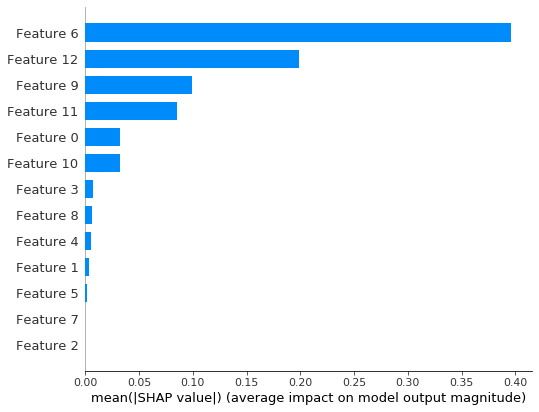

In [23]:
from sklearn.datasets import load_wine
import shap
from sklearn.ensemble import RandomForestRegressor
wine=load_wine()
X=wine['data']
y=wine['target']
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X, y)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

## Two groups - Tests
During the EDA, we have seen different ways to visualize differences between distributions for landslides and no-landslides. However, we might want to be more rigorous and try to assess the statistical significance of the difference between the distributions, i.e. answer the question “is the observed difference systematic or due to sampling noise?”.

We are now going to analyze different tests to discern two distributions from each other.

* T-test. The first and most common test is the student t-test. T-tests are generally used to compare means. In this case, we want to test whether the means of the income distribution are the same across the two groups. The test statistic for the two-means comparison test is given by:

$stat=\frac{|\overline{x_1}-\overline{x_2}|}{\sqrt{s^2 / n}}$

Where x̅ is the sample mean and s is the sample standard deviation. Under mild conditions, the test statistic is asymptotically distributed as a Student t distribution.

We use the ttest_ind function from scipy to perform the t-test. The function returns both the test statistic and the implied p-value.

In [12]:
from statsmodels.stats.weightstats import ttest_ind

Relief_n=data[data["Flash flood record"]==0]
Relief_y=data[data["Flash flood record"]==1]

stat, p_value = ttest_ind(Relief_n, Relief_y)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

OSError: [WinError 193] %1 is not a valid Win32 application

The p-value of the test is >0.05, therefore we do not reject the null hypothesis of no difference in means across landslide and no-landslide groups.

The t-test assumes that the variance in the two samples is the same so that its estimate is computed on the joint sample. Welch’s t-test allows for unequal variances in the two samples.

* Standardized Mean Difference (SMD). In general, it is good practice to always perform a test for differences in means on all variables across the treatment and control group, when we are running a randomized control trial or A/B test.

However, since the denominator of the t-test statistic depends on the sample size, the t-test has been criticized for making p-values hard to compare across studies. In fact, we may obtain a significant result in an experiment with a very small magnitude of difference but a large sample size while we may obtain a non-significant result in an experiment with a large magnitude of difference but a small sample size.

One solution that has been proposed is the standardized mean difference (SMD). As the name suggests, this is not a proper test statistic, but just a standardized difference, which can be computed as:

$SMD=\frac{|\overline{x_1}-\overline{x_2}|}{\sqrt{s^{2}_1 + s^{2}_2 / 2}}$

Usually, a value below 0.1 is considered a “small” difference. It is good practice to collect average values of all variables across treatment and control groups and a measure of distance between the two — either the t-test or the SMD — into a table that is called balance table. We can use the create_table_one function from the causalml library to generate it. As the name of the function suggests, the balance table should always be the first table you present when performing an A/B test.

In [ ]:
from causalml.match import create_table_one

df['test'] = df['Flash flood record']==1
create_table_one(df, 'test', df.columns)

In the first two columns, we can see the average of the different variables across the treatment and control groups, with standard errors in parenthesis. In the last column, the values of the SMD indicate a standardized difference of more than 0.1 for all variables, suggesting that the two groups are probably different.